In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import math

### 기술통계

 분포를 표현하는 또다른 방법은 분포의 특징을 나타내는 여러가지 숫자를 계산하여 그 숫자로서 분포를 나타내는 것이다. 이러한 값들을 **기술통계(descriptive statistics)**라고 한다. 대표적인 기술통계는 다음과 같다.

* 표본 평균, 표본 중앙값, 표본 최빈값
* 표본 분산, 표본 표준편차
* 표본 왜도, 표본 첨도

In [2]:
df = pd.read_csv('data3/ch4_scores400.csv')
scores = np.array(df['score']) #df['score'].values
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [3]:
df.info # len(df)

<bound method DataFrame.info of      score
0       76
1       55
2       80
3       80
4       74
..     ...
395     77
396     60
397     83
398     80
399     85

[400 rows x 1 columns]>

In [4]:
np.random.choice(list(range(1,11,1)),3)

array([3, 7, 8])

### 평균

####  모평균

In [5]:
scores.mean()

69.53

#### 표본평균(sample mean, sample average)

데이터 분포의 대략적인 위치를 나타낸다. 표본평균의 기호로는 알파벳 $m$ 또는 데이터를 나타내는 변수 기호 위에 bar를 붙인 $\bar x$ 기호를 사용한다.

$$ 
\begin{align}
m = \bar{x} = \dfrac{1}{N}\sum_{i=1}^{N} x_i 
\tag{1}
\end{align}
$$

이 식에서 $N$는 자료의 개수, $i$는 자료의 순서(index)를 의미한다. 

#### Result : 표본이 충분히 크면 모집단으로 근사한다는 것을 알 수 있음. 

In [6]:
n = 20
nSample = 100
xbar = np.array( [np.random.choice( scores, n ).mean() for _ in range(nSample)])

In [7]:
xbar

array([72.35, 66.6 , 70.7 , 76.5 , 67.1 , 76.  , 67.35, 70.95, 71.4 ,
       66.55, 73.05, 68.65, 72.15, 70.15, 72.35, 66.65, 72.2 , 67.95,
       66.05, 71.75, 74.3 , 67.85, 66.2 , 67.3 , 66.35, 65.65, 68.4 ,
       69.75, 69.75, 64.1 , 67.85, 69.35, 71.  , 74.55, 73.95, 67.9 ,
       67.65, 71.05, 59.85, 65.85, 69.65, 74.85, 66.8 , 72.15, 73.6 ,
       68.7 , 71.4 , 66.8 , 67.55, 69.6 , 64.75, 72.1 , 64.9 , 69.95,
       73.  , 71.65, 70.45, 73.05, 71.55, 64.15, 71.2 , 71.45, 71.  ,
       66.75, 75.15, 70.45, 68.65, 73.6 , 63.6 , 69.45, 64.5 , 64.3 ,
       69.7 , 70.45, 69.15, 68.  , 68.75, 73.3 , 68.15, 69.9 , 76.8 ,
       71.4 , 68.65, 69.35, 65.65, 69.8 , 66.15, 67.5 , 71.15, 71.45,
       65.4 , 71.95, 64.2 , 74.15, 70.05, 72.85, 72.7 , 64.7 , 68.2 ,
       71.05])

In [8]:
np.random.seed(0)
sample = np.random.choice(scores, 20)   # Default => replace = True (복원)
print( sample )
print( sample.mean() )

[49 60 72 86 52 61 77 91 80 56 69 67 90 56 75 79 60 79 68 81]
70.4


In [9]:
for i in range(5):
    smaple1 = np.random.choice( scores, 20 )
    print( i+1, '표본평균', smaple1.mean() )

1 표본평균 72.45
2 표본평균 63.7
3 표본평균 66.05
4 표본평균 71.7
5 표본평균 74.15


#### 표본 평균의 평균

In [10]:
xbar.mean()

69.524

### 분산과 표준편차

데이터가 얼마나 변동(variation)하고 있는지를 알아야 한다. 
이러한 정보를 알려주는 특징값이 **표본분산(sample variance)** 또는 **표본표준편차(sample standard deviation)**이다. 
평균이나 기댓값이 분포의 **위치**를 대표하는 것이라면 분산은 분포의 **폭(width)**을 대표하는 값이다. 표준편차는 분산에 대한 양의 제곱근(square root)값이다.

$$
\begin{align}
\text{표준편차} = \sqrt{\text{분산}}
\tag{2}
\end{align}
$$

표본분산은 다음처럼 구한다. 식에서 $\bar{x}$은 표본평균이다.

$$ 
\begin{align}
s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})^2 
\tag{3}
\end{align}
$$

위 식에서 구한 표본분산은 정확하게 말하면 편향오차를 가진 **편향 표본분산(biased sample variance)**이다. 이와 대조되는 **불편 표본분산(unbiased sample variance)**은 다음과 같이 구한다.

$$ 
\begin{align}
s^2_{\text{unbiased}} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-\bar{x})^2
\tag{4}
\end{align}
$$

#### 모평균의 분산

In [11]:
scores.var()/n

10.333454999999999

#### 표본평균의 분산

In [12]:
xbar.var()

10.382473999999997

#### 표본평균의 편차(SEM : standard error of the mean) = (평균의) 표준오차 
ex) $ \dfrac{ \sigma }{ \sqrt{n} } $

In [13]:
scores.std()/ math.sqrt(n)
xbar.std()

3.222184662616343

####  파이썬에서 표본분산과 표본표준편차를 구할 때는 다음 함수를 사용한다. `ddof` 인수를 이용하면 비편향 표본분산과 표본표준편차를 구할 수 있다.

* [`var()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)
* [`std()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)

* https://angeloyeo.github.io/2020/02/12/standard_error.html

In [14]:
sample.var(), sample.std() # 편향(Biased) 표본 분산(표준편차), Default => ddof=0 (데이터 수(N)으로 나눔.)

(150.34000000000003, 12.261321299109653)

In [15]:
np.var(sample), np.std(sample)

(150.34000000000003, 12.261321299109653)

In [16]:
sample.var(ddof=1),  sample.std(ddof=1)  # 불편(Unbiased) 표본 분산, ddof=1 (자유도로 나눔.)

(158.25263157894742, 12.579850220847124)

In [17]:
np.var(sample, ddof=1), np.std(sample,ddof=1)

(158.25263157894742, 12.579850220847124)

### 자유도

통계학에서 자유도(degrees of freedom)는 통계적 추정을 할 때 표본자료 중 모집단에 대한 정보를 주는 독립적인 자료의 수를 말한다.<br>
크기가 n인 표본의 관측값
$({\displaystyle x_{1},x_{2},\dots ,x_{n}}{\displaystyle x_{1},x_{2},\dots ,x_{n}})의 자유도는 n-1이다.$<br>
$거기서 구한 표본 {\displaystyle {\bar {x}}}에 대해서도 마찬가지이다.$
$$

$
\begin{align}
분산 {\displaystyle s^{2}={\frac {\sum _{i=1}^{n}({\bar {x}}-x_{i})^{2}}{n-1}}}에 대해, {\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}}인 관계식(여기서 {\displaystyle {\bar {x}}}는 모집단의 평균 μ의 추정치이다)이 있기 때문에
자유도는 1 적은 n-1이 된다.
\end{align}
$

### 모평균 추정

#### 신뢰구간(Confidence interval) => 1.96(95% 신뢰도), 2.58(99% 신뢰도)

n명을 임의로 표본추출.

모평균(μ), 모표쥰편차($ \sigma $)

표본평균: $ \bar{X} $  <br> 

$ \bar{X} -k * \dfrac{ \sigma }{ \sqrt{n} } \le m \le \bar{X} +k * \dfrac{ \sigma }{ \sqrt{n} }   $ <br>

k : 신뢰도 상수


표본갯수가 30개 이상이면 모표준편차와 표준편차를 동일한 것으로 본다 ($ s = \sigma $)

In [18]:
n      = 30
sampl1 = np.random.choice( scores, n )
sMean  = sampl1.mean()
sStd  = sampl1.std()

In [19]:
print('모평균', scores.mean())
print('표본평균', sMean )
print('모평균', scores.std())
print('표본편차', sStd )

모평균 69.53
표본평균 72.0
모평균 14.375990400664575
표본편차 12.385475364312828


#### 95% C.I for μ ( 모평균에 대한 95% 신뢰구간)

In [20]:
L = sMean - 1.96*( scores.std()/math.sqrt(n) )
U = sMean + 1.96*( scores.std()/math.sqrt(n) )
print( (L,U) )
print('신뢰구간의 길이', U-L)

(66.85561790377115, 77.14438209622885)
신뢰구간의 길이 10.288764192457705


In [21]:
st.norm.interval( 0.95, sMean, scale=st.sem(sampl1, ddof=0) )

(67.56799600220367, 76.43200399779633)

### 신뢰구간 연습문제

문제1. 어느 호수의 납의 농도는 표준편차가 3mg/L, 이 호수에서 납의 농도를 16번 측정한 결과 평균 농도는 18mg/L 이었다.<br>
이 호수에서 남의 농도에 대한 모평균 m 의 신뢰도 95%의 신뢰구간을 구하여라.

In [22]:
def CI(x, z, s, n):
    L = x - z*( s/math.sqrt(n) )
    U = x + z*( s/math.sqrt(n) )
    print( (L,U) )
    print('신뢰구간의 길이:',U-L)

In [23]:
xbar  = 18
s     = 3
n     = 16
Lower = xbar - 1.96*( s/math.sqrt(n) )
Upper = xbar + 1.96*( s/math.sqrt(n) )
print( (Lower,Upper) )
print('신뢰구간의 길이', Upper-Lower)

(16.53, 19.47)
신뢰구간의 길이 2.9399999999999977


In [24]:
CI( 18, 1.96 , 3, 16 )

(16.53, 19.47)
신뢰구간의 길이: 2.9399999999999977


In [25]:
N     = 16
sigma = 3
xbar  = 18
st.norm.interval(0.95, loc=xbar, scale=sigma/math.sqrt(N))

(16.53002701159496, 19.46997298840504)

문제2. 어느 고등학교 남학생 36명의 제자리멀리뛰기 기록은 평균이 216cm 표준편차가 10cm이었다.<br>
이 학교 남학생들의 제자리 멀리뛰기 기록에 대한 모평균 m의 신뢰도 99% 신뢰구간을 구하여라..

In [26]:
xbar  = 216
s     = 10
n  = 36
Lo = xbar - 2.58*( s/math.sqrt(n) )
Up = xbar + 2.58*( s/math.sqrt(n) )
print( (Lo,Up) )
print('신뢰구간의 길이', Up-Lo)

(211.7, 220.3)
신뢰구간의 길이 8.600000000000023


In [27]:
CI( 216,2.58, 10, 36 )

(211.7, 220.3)
신뢰구간의 길이: 8.600000000000023


### 중심극한의 정리(CLT : Central Limit Theorem)
- 모집단의 분포가 무엇이든 상관없이 표본의 크기(n)이 충분히 크면 표본평균의 분포는 근사적으로 정규분포가 된다. 즉 평균, 표준편차인 임의의 모집단으로부터의 표본평균은 n이 크면 평균, 표준편차 σ/ root n 인 정규포분포를 따른다.

In [28]:
n           = 20
nSample     = 10000
sample_mean = np.array( [np.random.choice( scores, n ).mean() for _ in range(nSample)])

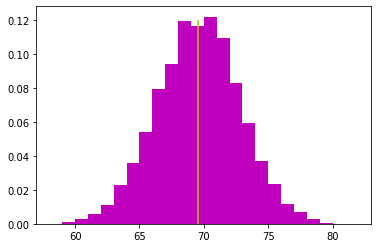

In [33]:
plt.hist( sample_mean, bins=100, range=(0,100), density=True, color='m')
plt.xlim(57,83)
plt.vlines( scores.mean(), 0, 0.12, colors='y',)
plt.show()

#### 모집단의 Histogram

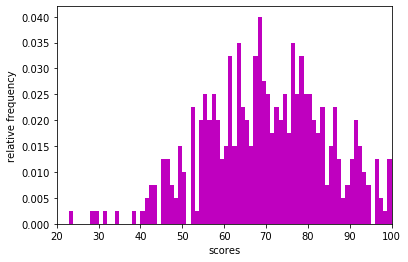

In [30]:
plt.xlabel('scores');plt.ylabel('relative frequency')
plt.hist( scores, bins=100, range=(0,100), density=True , color='m')
plt.xlim( 20,100 );plt.show()

#### 표본의 Histogram

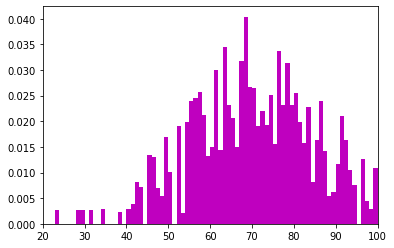

In [31]:
sample2 = np.random.choice( scores, 10000 )
plt.hist( sample2, bins=100, range=(0,100), density=True, color='m')
plt.xlim( 20,100 );plt.show()